In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import sys
import os

from datetime import datetime
import subprocess

from os.path import exists

import read_config_utils as cu

import matplotlib as mpl

In [15]:
resolution = [0., 0.25, 0.50, 0.75]

err_ratio_mean_simple = [1.00, 1.03, 1.18, 1.29]
err_ratio_mean_nn     = [1.26, 1.24, 1.36, 1.45]

err_ratio_err = [0.03, 0.03, 0.04, 0.04]

err_ratio_cov_simple = [1.03, 1.09, 1.24, 1.42]
err_ratio_cov_nn     = [1.21, 1.23, 1.41, 1.62]


(0.9, 1.9)

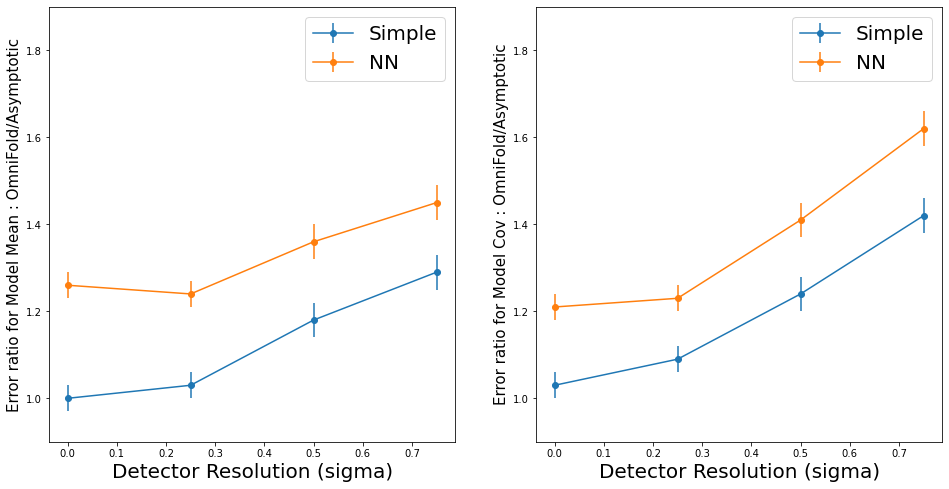

In [32]:
fig,ax = plt.subplots( 1, 2, figsize=(2*8,8))

ax[0].errorbar(resolution, err_ratio_mean_simple, err_ratio_err, marker='o', label='Simple')
ax[0].errorbar(resolution, err_ratio_mean_nn, err_ratio_err, marker='o', label='NN')

ax[1].errorbar(resolution, err_ratio_cov_simple, err_ratio_err, marker='o', label='Simple')
ax[1].errorbar(resolution, err_ratio_cov_nn, err_ratio_err, marker='o', label='NN')

ax[0].legend( fontsize=20, loc='best')
ax[1].legend( fontsize=20, loc='best')

ax[0].set_xlabel('Detector Resolution (sigma)', fontsize=20)
ax[1].set_xlabel('Detector Resolution (sigma)', fontsize=20)

ax[0].set_ylabel('Error ratio for Model Mean : OmniFold/Asymptotic', fontsize=15)
ax[1].set_ylabel('Error ratio for Model Cov : OmniFold/Asymptotic', fontsize=15)

ax[0].set_ylim([0.9,1.9])
ax[1].set_ylim([0.9,1.9])
